# Importing all necessary Libraries

In [ ]:
!pip install tensorflow-text --no-dependencies

In [ ]:
#necessary libraries
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


# Importing the Files

In [ ]:
# Mount Google Drive - applicable, if working on Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read file
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/FakeNewsDetection/news1.csv")
df.head()

,Title,Description,label
0,अन्तराष्ट्रिय नेताहरूले फाइनल G20 ओबामाको अनाद...,अन्तर्राष्ट्रिय नेताहरूले अन्तिम G20 शिखर सम्म...,1
1,सिनासको जर्नल ३५ वर्षपछि पुन प्रकाशन,त्रिभुवन विश्वविद्यालयअन्तर्गत नेपाल एसियाली अ...,0
2,९ वाणिज्य बैंकले घोषणा लाभांश बैंकको,हालसम्म ९ वाणिज्य बैंकले सेयर लगानीकर्तालाई दि...,0
3,नेपाली पत्रकारिताबारे समालोचनात्मक पुस्तक प्रक...,नेपाली पत्रकारितासम्बन्धी अनुसन्धानमा आधारित प...,0
4,दयनीय ट्रम्पले एमिनेमलाई भनेनन् र्यापर अत्यन्त...,गम्भीरतापूर्वक दयनीय प्रचार प्रयासमा एमिनेमले ...,1


In [ ]:
df['Description'][0]

'अन्तर्राष्ट्रिय नेताहरूले अन्तिम G20 शिखर सम्मेलनमा ओबामाप्रति घृणा सम्मानको कमीको गोप्य राखेका फिलिपिन्सका राष्ट्रपति बाराक ओबामाले फिलिपिन्सका राष्ट्रपति रोड्रिगो डी टेन्टेसँगको भेट रद्द धम्की दिएका कुतिया एसोसिएटेड प्रेसका डुटेर्टेले जी२० शिखर सम्मेलनमा ओबामालाई सम्मान आग्रह भन्यो कुतियाको छोरा फोरममा तपाईलाई कसम खान्छु डुटेर्टेले लागुऔषध समूह विरुद्धको हिंसात्मक युद्धको सम्भावित छलफललाई संकेत प्रक्रियामा 2400 व्यक्तिको मृत्यु चीनमा G20 शिखर सम्मेलनमा पत्रकार सम्मेलनको क्रममा ओबामाले डुटेर्टे बीचको बैठक रद्द संकेत टोलीलाई फिलिपिन्सका समकक्षीहरूसँग निर्देशन रचनात्मक फलदायी कुराकानी सक्छौं भनेओबामाले संयुक्त राज्यले उचित प्रक्रियाको आवश्यकतालाई जोड दिनेछ आधारभूत अन्तर्राष्ट्रिय मापदण्डहरू उद्धृत लागूऔषध अपराधीहरूको अभियोगमा डी टेन्टको टिप्पणीको बाबजुद बैठकमा उठाउने एशियाको अन्तिम भ्रमणमा विश्वको सबैभन्दा अर्थतन्त्रका नेता ब्रेइटबार्टचीना पूर्वमा अवतरण रोलिङ सिँढी उपलब्ध नभएपछि एयर फोर्स वनबाट विमानको पेटमा थोरै प्रयोग गरिएको निकासबाट ओर्लन बाध्य चिनियाँ सहर शनिबार दिउँसो ओबामा टार्मा

In [ ]:
len(df)

19028

In [ ]:
df.drop(['Title'],axis=1,inplace=True)

In [ ]:
#testing if data has null value
df.isnull().sum()

Description    0
label          0
dtype: int64

In [ ]:
df

,Description,label
0,अन्तर्राष्ट्रिय नेताहरूले अन्तिम G20 शिखर सम्म...,1
1,त्रिभुवन विश्वविद्यालयअन्तर्गत नेपाल एसियाली अ...,0
2,हालसम्म ९ वाणिज्य बैंकले सेयर लगानीकर्तालाई दि...,0
3,नेपाली पत्रकारितासम्बन्धी अनुसन्धानमा आधारित प...,0
4,गम्भीरतापूर्वक दयनीय प्रचार प्रयासमा एमिनेमले ...,1
...,...,...
19023,कलरटाइम्स बुधवार सीएनएनमा बोल्दै चौथोअवधिका का...,1
19024,ठूला योजनाबद्ध मल झगडाहरू सोमबार अमेरिकाभरि फै...,1
19025,काठमाडौं साउन ४ गते संस्करणको मिस्टर एण्ड मिस ...,0
19026,प्रधानमन्त्री एवं नेकपा एमालेका अध्यक्ष केपी श...,0


In [ ]:
df.columns

Index(['Description', 'label'], dtype='object')

([<matplotlib.patches.Wedge at 0x7f64c0711d00>,
 [Text(-1.2000000000000002, 1.469576158976824e-16, 'Fake'),
  Text(1.2000000000000002, -2.939152317953648e-16, 'True')],
 [Text(-0.7, 8.572527594031472e-17, '50.0%'),
  Text(0.7, -1.7145055188062944e-16, '50.0%')])

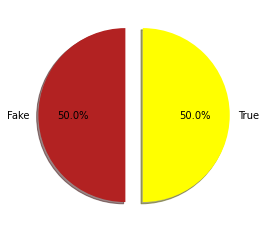

In [ ]:
import matplotlib.pyplot as plt
# Checking if our data is well balanced
label_size = [df['label'].sum(),len(df['label'])-df['label'].sum()]
plt.pie(label_size,explode=[0.1,0.1],colors=['firebrick','yellow'],startangle=90,shadow=True,labels=['Fake','True'],autopct='%1.1f%%')

# Train_Test_Split_Dataset

In [ ]:
# split the data into training and test sets, with 80% of the data for training and 20% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Description'], df['label'], test_size=0.2, random_state=42)

In [ ]:
X_train.head()

7652     भारतीय प्रधानमन्त्री नरेन्द्र मोदीको बंगलादेश ...
15674    अमेरिकी मानिसलाई हिलारीको असक्षमता ढाक्नको स्क...
4126     काठमाडौं असार १६ गते नेपाल चलचित्र विकास बोर्ड...
13583    डोनाल्ड ट्रम्पका बच्चाहरूले आत्मामा समर्थन सक्...
3289     ग्राहकले बैंकिङ सेवा अनुरोध सिधै च्याटबट सेवाम...
Name: Description, dtype: object

In [ ]:
y_train.head()

7652     0
15674    1
4126     0
13583    1
3289     0
Name: label, dtype: int64

# BERT FineTuning

## Importing pretrained BERT_model

In [ ]:
#import bert model
#bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
#bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")


#text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
bert_preprocess = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3")
#encoder_inputs = preprocessor(text_input)
bert_encoder = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/4",
    trainable=False)
#outputs = encoder(encoder_inputs)
#pooled_output = outputs["pooled_output"]      # [batch_size, 768].
#sequence_output = outputs["sequence_output"]  # [batch_size, seq_length, 768].

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.11.0


## Preparing the input

In [ ]:
#preprocessing
bert_preprocess([
    "हिउँले ढाकिएर सेताम्मे हुने हिमाली क्षेत्रका डाँडाकाँडा",
    "नक्कली समाचार पत्ता लगाउने"]
)

{'input_word_ids': <tf.Tensor: shape=(2, 128), dtype=int32, numpy=
 array([[   101,    899,  12878, 111194,  28462,  13665,    878,  11208,
          66943,  76131,  11072,  13537,  45753,  13841,  11554,  70317,
            899,  50419,  88113,  21582,  15399,    877,  65343,  43071,
          15399,  28462,  43071,    102,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0, 

In [ ]:
#function for sentence embedding
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

In [ ]:
#sentence_embedding
get_sentence_embeding([
    "हिउँले ढाकिएर सेताम्मे हुने हिमाली क्षेत्रका डाँडाकाँडा",
    "नक्कली समाचार पत्ता लगाउने?"]
)

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[ 0.2858737 , -0.11931743,  0.17314018, ..., -0.31497347,
         0.09068779,  0.11899757],
       [ 0.30856776,  0.12257735,  0.28575134, ..., -0.5045693 ,
         0.16809262,  0.19743565]], dtype=float32)>

## Defining the Model Architecture

In [ ]:
# model defination using l1 regularization

from keras import regularizers

# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
hidden1 = tf.keras.layers.Dropout(0.1, name="hidden1")(outputs['pooled_output'])
dropout1 = tf.keras.layers.Dense(264, activation='sigmoid', kernel_regularizer=regularizers.l1(0.001), name="dropout1")(hidden1)
hidden2 = tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001), name='hidden_2')(dropout1)
dropout2 = tf.keras.layers.Dense(1, activation='sigmoid', name="dropout2")(hidden2)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [dropout2])

In [ ]:
model.summary()

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.11.0


## Optimizer and Loss Function Definition

In [ ]:
!pip install keras-radam

In [ ]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=1e-3)

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=METRICS)

## Training the BERT model

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30)
print(history)

Epoch 1/30
476/476 [==============================] - 204s 403ms/step - loss: 1.5370 - accuracy: 0.7573 - precision: 0.7339 - recall: 0.8055
Epoch 2/30
476/476 [==============================] - 178s 374ms/step - loss: 0.6584 - accuracy: 0.8630 - precision: 0.8375 - recall: 0.9001
Epoch 3/30
476/476 [==============================] - 183s 384ms/step - loss: 0.4535 - accuracy: 0.9110 - precision: 0.8939 - recall: 0.9325
Epoch 4/30
476/476 [==============================] - 180s 378ms/step - loss: 0.3676 - accuracy: 0.9313 - precision: 0.9198 - recall: 0.9447
Epoch 5/30
476/476 [==============================] - 177s 373ms/step - loss: 0.3279 - accuracy: 0.9439 - precision: 0.9338 - recall: 0.9552
Epoch 6/30
476/476 [==============================] - 177s 371ms/step - loss: 0.3177 - accuracy: 0.9426 - precision: 0.9312 - recall: 0.9555
Epoch 7/30
476/476 [==============================] - 175s 368ms/step - loss: 0.3088 - accuracy: 0.9465 - precision: 0.9370 - recall: 0.9571
Epoch 8/30
47

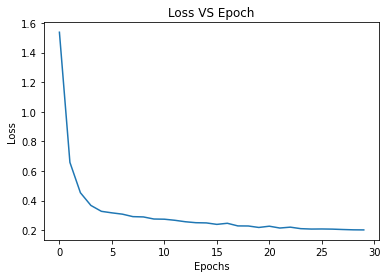

In [ ]:
#Plotting the loss Vs Epoch Graph

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Loss VS Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [ ]:
#plotting accuracy vs epoch
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('Accuracy VS Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


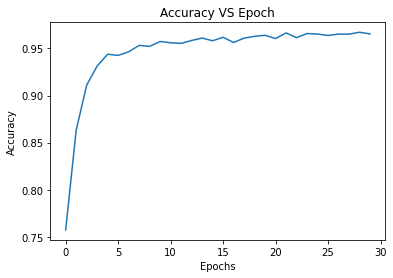

In [ ]:
#plotting accuracy vs epoch
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('Accuracy VS Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


##Evaluating the model on the Test test

In [ ]:
model.evaluate(X_test, y_test)

119/119 [==============================] - 52s 427ms/step - loss: 0.2112 - accuracy: 0.9711 - precision: 0.9814 - recall: 0.9609


[0.21119791269302368,
 0.9710982441902161,
 0.9813730716705322,
 0.9609171152114868]

In [ ]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

In [ ]:
y_test[:100]

In [ ]:
y_predicted[:100]

## Evaluating the Model Performance

In [ ]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm

array([[1852,   35],
       [  75, 1844]])

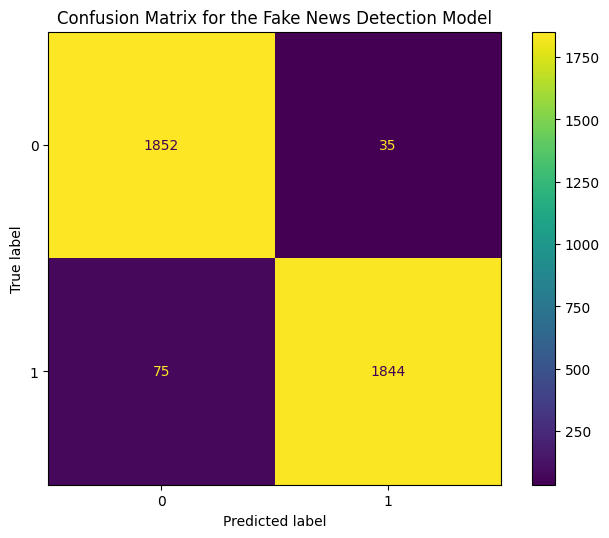

In [ ]:
#Displaying Confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay



# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Fake News Detection Model')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1887
           1       0.98      0.96      0.97      1919

    accuracy                           0.97      3806
   macro avg       0.97      0.97      0.97      3806
weighted avg       0.97      0.97      0.97      3806



In [ ]:
import numpy as np
y_test_array = y_test.values

# use boolean indexing to select only the 0s and 1s
y_test_01 = y_test_array[(y_test_array == 0) | (y_test_array == 1)]
arr1=np.array(y_test_01)
print(arr1)

[1 0 1 ... 1 0 1]


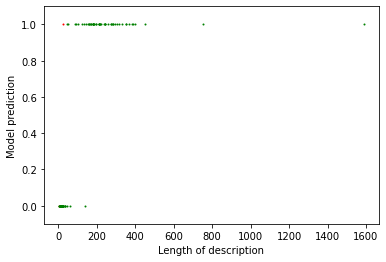

In [ ]:
import matplotlib.pyplot as plt
y_pred = y_predicted  # Make predictions on the test data
y_pred_rounded = [round(pred) for pred in y_pred]  # Round the predictions to 0 or 1

# Calculate the length of each description in the test data
desc_lengths = [len(desc.split()) for desc in X_test]

# Create two lists to store the x and y coordinates of the points to be plotted
x_coords = []
y_coords = []

#for checking if plot  is working correctly

    #y_pred=np.append(y_pred,0.6)
    #y_pred=np.append(y_pred,0.4)

    #desc_lengths=np.append(desc_lengths,1000)
    #desc_lengths=np.append(desc_lengths,1000)
    #plt.scatter(desc_lengths[0], y_pred[0], color='green')
    #plt.scatter(desc_lengths[0], y_pred[0], color='red')

# Iterate over the predictions and actual values and add the corresponding points to the lists
for i in range(len(arr1[:100])):

    if y_pred_rounded[i] == arr1[i]:
        color = 'green'  # If the prediction is correct, plot the point as green
    else:
        color = 'red'  # If the prediction is incorrect, plot the point as red
    x_coords.append(desc_lengths[i])
    y_coords.append(y_pred[i])
    plt.scatter(desc_lengths[i], y_pred[i],s=1, color=color)

# Set the x and y labels for the plot
plt.xlabel('Length of description')
plt.ylabel('Model prediction')


#adding legend(not working correctly)

#correct_patch = plt.plot([],[], marker="o", ms=5, ls="", mec=None, color='green', label='Correct Prediction')
#incorrect_patch = plt.plot([],[], marker="o", ms=5, ls="", mec=None, color='red', label='Incorrect Prediction')
#plt.legend(handles=[correct_patch[0], incorrect_patch[0]])

# Show the plot

plt.ylim(-0.1,1.1)
plt.show()

In [ ]:
import tensorflow as tf
print(tf.__version__)



2.11.0


In [ ]:
# Save the model
model.save('/content/drive/My Drive/FakeNewsDetection/model5.h5')

In [ ]:
#saving of trained model
tf.saved_model.save(model,"/content/drive/My Drive/FakeNewsDetection/model2")

# Fake News Prediction using for Unseen DaTaSet

In [ ]:
#testing on a new data
def get_prediction(news_description):
  probability = model.predict([[news_description]])
  if probability>0.5:
      return 'fake'

  elif probability<0.5:
     return 'real'

In [ ]:
#for fake news prediction
model.predict(["ग्रेट ब्रिटेनको बकिंघम प्यालेसले हिजो घोषणा गर्‍यो कि प्रिन्स ह्यारी, डायनाका कान्छो छोरा, वेल्सको राजकुमारी, इन्गेजमेन्ट भएको छ। युनाइटेड"])

1/1 [==============================] - 0s 48ms/step


array([[0.41143483]], dtype=float32)

In [ ]:
#for true news prediction
true_news="नेपाल क्रिकेट संघ (क्यान) का सात पदाधिकारीले मंगलबार क्यानको बोर्ड बैठकमा राजीनामा माग गर्दै पत्र बुझाए । क्यान अध्यक्ष चतुरबहादुर चन्द, कोषाध्यक्ष रोशन सिंह र प्रशान्तविक्रम मल्ललगायतको राजीनामा माग गर्दै पत्र बुझाएका थिए ।"
get_prediction(true_news)

1/1 [==============================] - 0s 49ms/step


'real'